In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle

In [3]:
data=pd.read_csv('/content/drive/MyDrive/datasets/Astronomy Steller Datasets/Stars.csv')
data.head()
# Red Dwarf -0 , Brown Dwarf -1 , White Dwarf -2 , Main Sequence -3 , Super Giants -4 , Hyper Giants -5 

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
data=shuffle(data)
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
20,25000,0.05600,0.00840,10.58,Blue White,B,2
143,14520,0.00082,0.00972,11.92,Blue White,B,2
105,14245,231000.00000,42.00000,-6.12,Blue,O,4
111,3605,126000.00000,1124.00000,-10.81,Red,M,5
34,5800,0.81000,0.90000,5.05,yellow-white,F,3


In [5]:
data['Type']=data['Type'].map({0:'Red Dwarf', 1:'Brown Dwarf', 2:'White Dwarf', 3:'Main Sequence', 4:'Super Giants', 5:'Hyper Giants'})

In [6]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
20,25000,0.05600,0.00840,10.58,Blue White,B,White Dwarf
143,14520,0.00082,0.00972,11.92,Blue White,B,White Dwarf
105,14245,231000.00000,42.00000,-6.12,Blue,O,Super Giants
111,3605,126000.00000,1124.00000,-10.81,Red,M,Hyper Giants
34,5800,0.81000,0.90000,5.05,yellow-white,F,Main Sequence


## Data Analysis

In [7]:
data.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


In [8]:
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

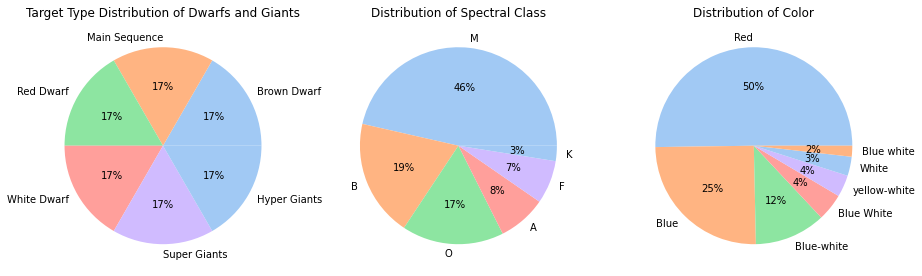

In [9]:
plt.rcParams['figure.figsize']=(15,5)
colors = sns.color_palette('pastel')[0:5]
plt.subplot(1,3,1)
plt.pie(x=data['Type'].value_counts().values,labels = data['Type'].value_counts().keys(), colors = colors, autopct='%.0f%%')
plt.title('Target Type Distribution of Dwarfs and Giants')
plt.subplot(1,3,2)
plt.pie(x=data['Spectral_Class'].value_counts().values[:6],labels = data['Spectral_Class'].value_counts().keys()[:6], colors = colors, autopct='%.0f%%')
plt.title('Distribution of Spectral Class')
plt.subplot(1,3,3)
plt.pie(x=data['Color'].value_counts().values[:7],labels = data['Color'].value_counts().keys()[:7], colors = colors, autopct='%.0f%%')
plt.title('Distribution of Color')
plt.show()

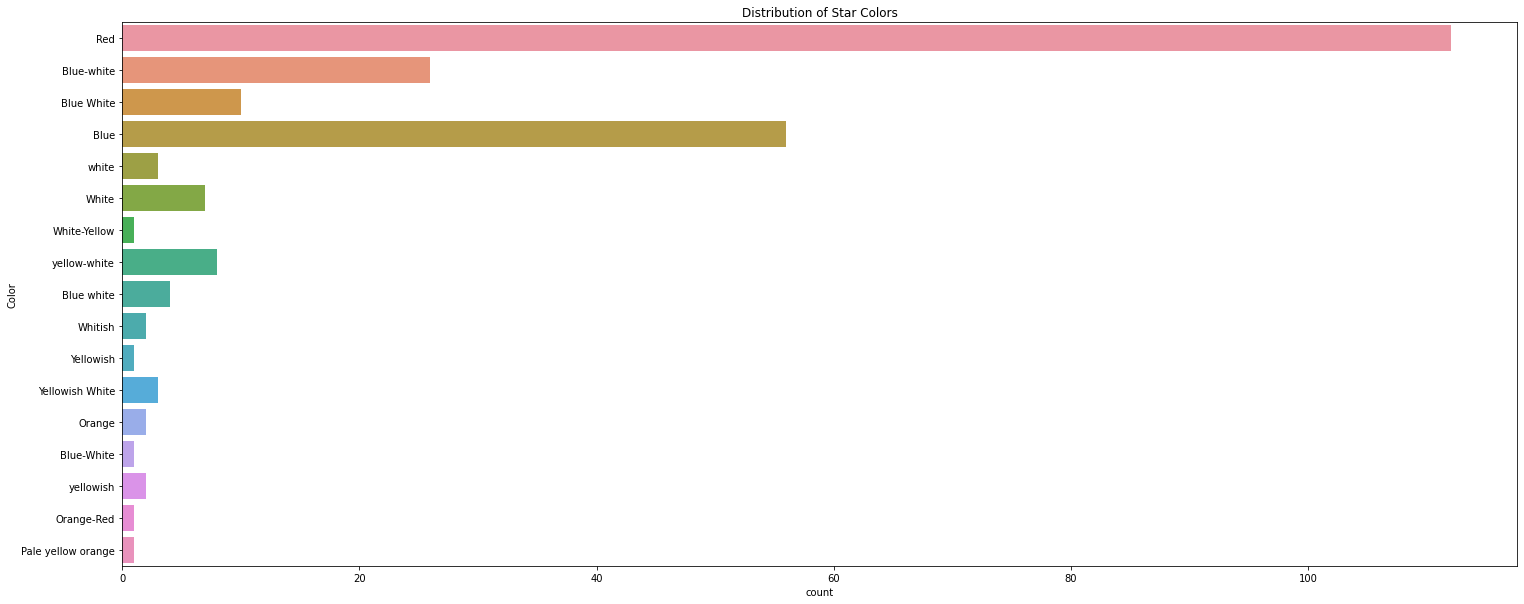

In [10]:
plt.rcParams['figure.figsize']=(25,10)
plt.title('Distribution of Star Colors')
sns.countplot(y="Color", data=data)
plt.show()

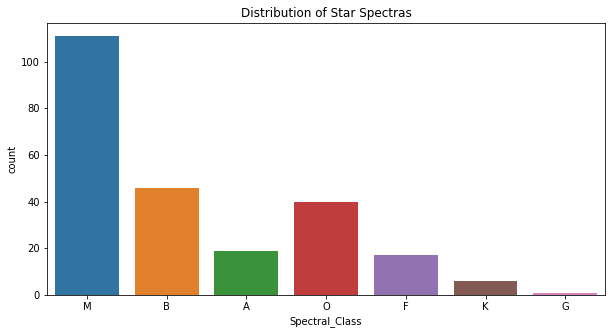

In [11]:
plt.rcParams['figure.figsize']=(10,5)
plt.title('Distribution of Star Spectras')
sns.countplot(x="Spectral_Class", data=data)
plt.show()

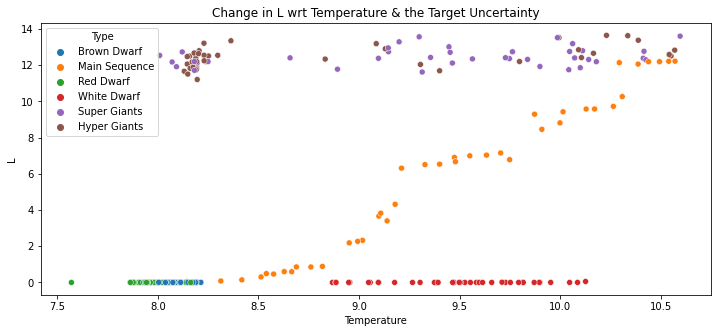

In [12]:
plt.rcParams['figure.figsize']=(12,5)
plt.title('Change in L wrt Temperature & the Target Uncertainty')
sns.scatterplot(x=np.log1p(data['Temperature']),y=np.log1p(data['L']),hue=data['Type']) 	
plt.show()	

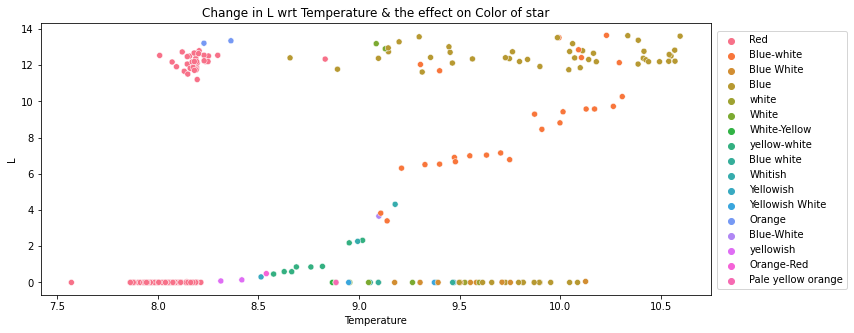

In [13]:
plt.rcParams['figure.figsize']=(12,5)
plt.title('Change in L wrt Temperature & the effect on Color of star')
sns.scatterplot(x=np.log1p(data['Temperature']),y=np.log1p(data['L']),hue=data['Color']) 	
plt.legend(bbox_to_anchor=(1.01, 0.97), loc=2, borderaxespad=0.)
plt.show()	

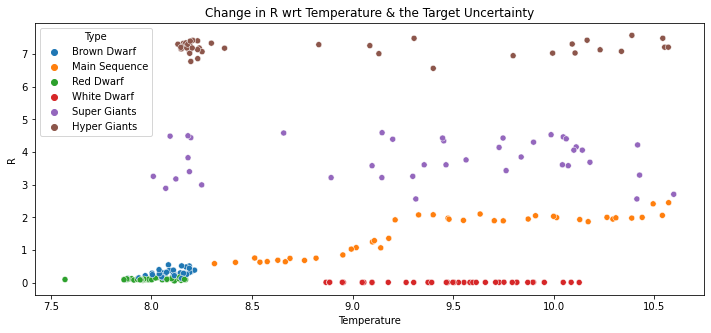

In [14]:
plt.rcParams['figure.figsize']=(12,5)
plt.title('Change in R wrt Temperature & the Target Uncertainty')
sns.scatterplot(x=np.log1p(data['Temperature']),y=np.log1p(data['R']),hue=data['Type']) 	
plt.show()	

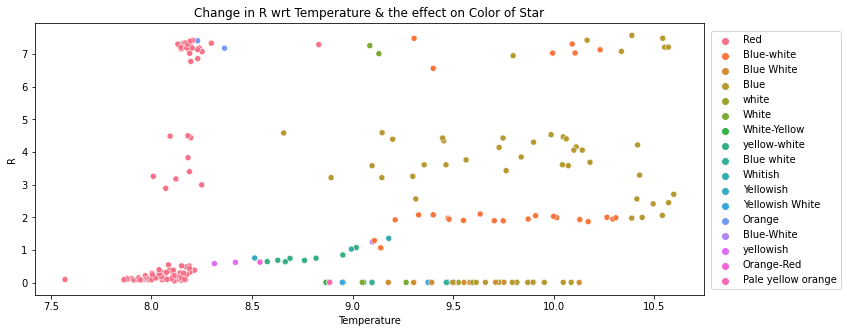

In [15]:
plt.rcParams['figure.figsize']=(12,5)
plt.title('Change in R wrt Temperature & the effect on Color of Star')
sns.scatterplot(x=np.log1p(data['Temperature']),y=np.log1p(data['R']),hue=data['Color']) 	
plt.legend(bbox_to_anchor=(1.01, 0.97), loc=2, borderaxespad=0.)
plt.show()	

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


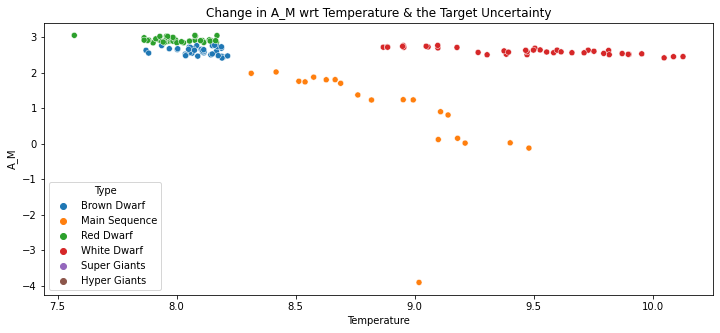

In [16]:
plt.rcParams['figure.figsize']=(12,5)
plt.title('Change in A_M wrt Temperature & the Target Uncertainty')
sns.scatterplot(x=np.log1p(data['Temperature']),y=np.log1p(data['A_M']),hue=data['Type']) 	
plt.show()	

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


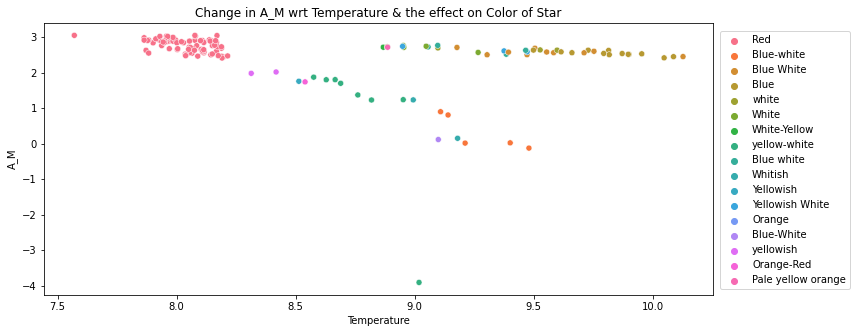

In [17]:
plt.rcParams['figure.figsize']=(12,5)
plt.title('Change in A_M wrt Temperature & the effect on Color of Star')
sns.scatterplot(x=np.log1p(data['Temperature']),y=np.log1p(data['A_M']),hue=data['Color']) 	
plt.legend(bbox_to_anchor=(1.01, 0.97), loc=2, borderaxespad=0.)
plt.show()	

In [18]:
data.groupby('Type').agg({'Temperature':'mean','L':'mean','R':'mean','A_M':'mean'}).style.background_gradient(cmap='Wistia')

,Temperature,L,R,A_M
Type,,,,
Brown Dwarf,3283.825000,0.005406,0.348145,12.539975
Hyper Giants,11405.700000,309246.525000,1366.897500,-9.654250
Main Sequence,16018.000000,32067.386275,4.430300,-0.367425
Red Dwarf,2997.950000,0.000693,0.110015,17.563500
Super Giants,15347.850000,301816.250000,51.150000,-6.369925
White Dwarf,13931.450000,0.002434,0.010728,12.582500


In [19]:
data.groupby(['Type','Color']).agg({'Temperature':'mean','L':'mean','R':'mean','A_M':'mean'}).style.background_gradient(cmap='Wistia')

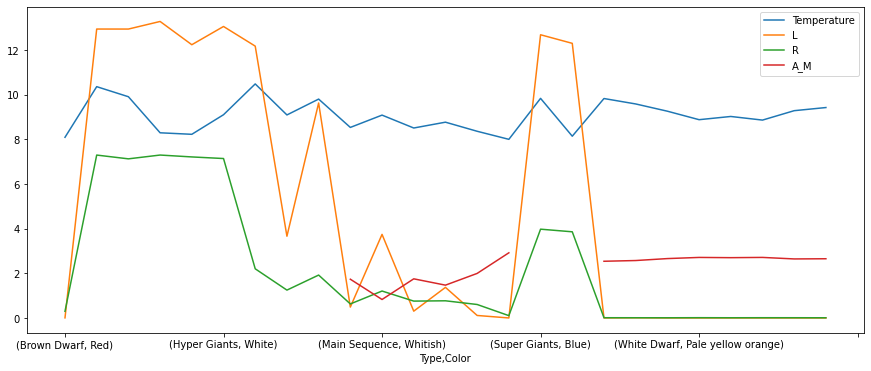

In [20]:
plt.rcParams['figure.figsize']=(15,6)
u=data.groupby(['Type','Color']).agg({'Temperature':'mean','L':'mean','R':'mean','A_M':'mean'})
np.log1p(u).plot()

In [21]:
from ipywidgets import interact_manual
import warnings
warnings.filterwarnings('ignore')
@interact_manual
def GET_INFORMATION(Star1=data['Type'].unique(),Color1=data['Color'].unique()):
  z1=data[(data['Type']==Star1) & (data['Color']==Color1)][['Temperature','L','R','A_M']]
  print(z1.shape)
  plt.rcParams['figure.figsize']=(15,10)
  colors = sns.color_palette('pastel')[0:5]
  plt.subplot(2,2,1)
  sns.distplot(z1['Temperature'])
  plt.title(f'Distribution of Temperature of star {Star1}')
  plt.subplot(2,2,2)
  sns.distplot(z1['L'])
  plt.title(f'Distribution of L of star {Star1}')
  plt.subplot(2,2,3)
  sns.distplot(z1['R'])
  plt.title(f'Distribution of R of star {Star1}')
  plt.subplot(2,2,4)
  sns.distplot(z1['A_M'])
  plt.title(f'Distribution of A_M of star {Star1}')
  plt.show()


interactive(children=(Dropdown(description='Star1', options=('Brown Dwarf', 'Main Sequence', 'Red Dwarf', 'Whi…

## Predictive Analysis

In [22]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

In [23]:
data.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type               object
dtype: object

In [24]:
data[data.select_dtypes(['int64','float64']).columns]=StandardScaler().fit_transform(data[data.select_dtypes(['int64','float64']).columns])

In [25]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
77,-0.750638,-0.598624,-0.458944,0.712390,Red,M,Brown Dwarf
139,-0.729762,-0.598624,-0.459043,0.946440,Red,M,Brown Dwarf
210,1.243381,-0.529093,-0.447216,-0.766125,Blue-white,B,Main Sequence
66,-0.792285,-0.598624,-0.459359,1.327962,Red,M,Red Dwarf
149,0.260848,-0.598624,-0.459520,0.651498,Blue White,B,White Dwarf


Because Features are less so we onehot encode the categorical features

In [26]:
encoder=OneHotEncoder()
U=encoder.fit_transform(np.array(data['Color']).reshape(-1,1)).toarray()
data[[i.split('_')[1] for i in encoder.get_feature_names()]]=U
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Blue,Blue White,Blue white,...,Pale yellow orange,Red,White,White-Yellow,Whitish,Yellowish,Yellowish White,white,yellow-white,yellowish
77,-0.750638,-0.598624,-0.458944,0.712390,Red,M,Brown Dwarf,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,-0.729762,-0.598624,-0.459043,0.946440,Red,M,Brown Dwarf,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,1.243381,-0.529093,-0.447216,-0.766125,Blue-white,B,Main Sequence,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,-0.792285,-0.598624,-0.459359,1.327962,Red,M,Red Dwarf,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,0.260848,-0.598624,-0.459520,0.651498,Blue White,B,White Dwarf,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data.drop(columns=['Color'],inplace=True)

In [28]:
encoder2=OneHotEncoder()
U=encoder2.fit_transform(np.array(data['Spectral_Class']).reshape(-1,1)).toarray()
data[[i.split('_')[1] for i in encoder2.get_feature_names()]]=U
data.head()

,Temperature,L,R,A_M,Spectral_Class,Type,Blue,Blue White,Blue white,Blue-White,...,white,yellow-white,yellowish,A,B,F,G,K,M,O
77,-0.750638,-0.598624,-0.458944,0.712390,M,Brown Dwarf,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
139,-0.729762,-0.598624,-0.459043,0.946440,M,Brown Dwarf,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210,1.243381,-0.529093,-0.447216,-0.766125,B,Main Sequence,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
66,-0.792285,-0.598624,-0.459359,1.327962,M,Red Dwarf,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149,0.260848,-0.598624,-0.459520,0.651498,B,White Dwarf,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data.drop(columns=['Spectral_Class'],inplace=True)

In [30]:
data.head()

,Temperature,L,R,A_M,Type,Blue,Blue White,Blue white,Blue-White,Blue-white,...,white,yellow-white,yellowish,A,B,F,G,K,M,O
77,-0.750638,-0.598624,-0.458944,0.712390,Brown Dwarf,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
139,-0.729762,-0.598624,-0.459043,0.946440,Brown Dwarf,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210,1.243381,-0.529093,-0.447216,-0.766125,Main Sequence,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
66,-0.792285,-0.598624,-0.459359,1.327962,Red Dwarf,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149,0.260848,-0.598624,-0.459520,0.651498,White Dwarf,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X=data.drop(columns=['Type']).values
Y=data['Type'].values

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((192, 28), (48, 28), (192,), (48,))

In [33]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
def FIT(MODEL):
  model=MODEL
  model.fit(x_train,y_train)
  model.score(x_test,y_test)
  results=model.predict(x_test)
  print(f'Training Accuracy : {model.score(x_train,y_train)}')
  print(f'Testing Accuracy : {model.score(x_test,y_test)}')
  print('                    Classificatio Report')
  print(classification_report(y_test,results))
  plt.rcParams['figure.figsize']=(15,5)
  plt.subplot(1,2,1)
  sns.heatmap(confusion_matrix(y_train,model.predict(x_train)),annot=True)
  plt.title('Training Confusion Metrics')
  plt.subplot(1,2,2)
  sns.heatmap(confusion_matrix(y_test,results),annot=True)
  plt.title('Testing Confusion Metrics')
  plt.show()
  return model

Training Accuracy : 0.9895833333333334
Testing Accuracy : 0.9583333333333334
                    Classificatio Report
               precision    recall  f1-score   support

  Brown Dwarf       1.00      0.88      0.93         8
 Hyper Giants       1.00      1.00      1.00         7
Main Sequence       0.88      1.00      0.93         7
    Red Dwarf       0.89      1.00      0.94         8
 Super Giants       1.00      0.92      0.96        12
  White Dwarf       1.00      1.00      1.00         6

     accuracy                           0.96        48
    macro avg       0.96      0.97      0.96        48
 weighted avg       0.96      0.96      0.96        48



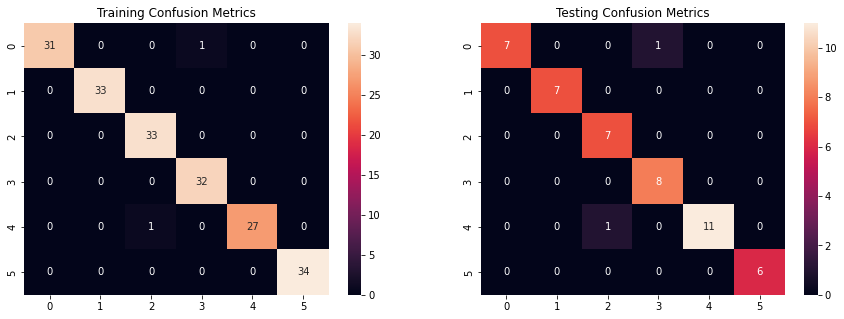

In [36]:
model=FIT(SVC())
pickle.dump(model, open('SVC_Model.pkl', 'wb'))

Training Accuracy : 0.984375
Testing Accuracy : 0.9583333333333334
                    Classificatio Report
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
 Hyper Giants       1.00      0.86      0.92         7
Main Sequence       0.78      1.00      0.88         7
    Red Dwarf       1.00      1.00      1.00         8
 Super Giants       1.00      0.92      0.96        12
  White Dwarf       1.00      1.00      1.00         6

     accuracy                           0.96        48
    macro avg       0.96      0.96      0.96        48
 weighted avg       0.97      0.96      0.96        48



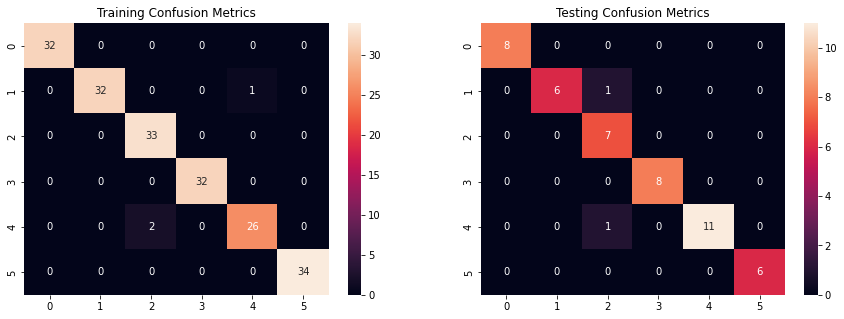

In [37]:
model=FIT(KNeighborsClassifier(n_neighbors=5))
pickle.dump(model, open('KNeighborsClassifier_Model.pkl', 'wb'))

Training Accuracy : 1.0
Testing Accuracy : 0.9791666666666666
                    Classificatio Report
               precision    recall  f1-score   support

  Brown Dwarf       0.89      1.00      0.94         8
 Hyper Giants       1.00      1.00      1.00         7
Main Sequence       1.00      0.86      0.92         7
    Red Dwarf       1.00      1.00      1.00         8
 Super Giants       1.00      1.00      1.00        12
  White Dwarf       1.00      1.00      1.00         6

     accuracy                           0.98        48
    macro avg       0.98      0.98      0.98        48
 weighted avg       0.98      0.98      0.98        48



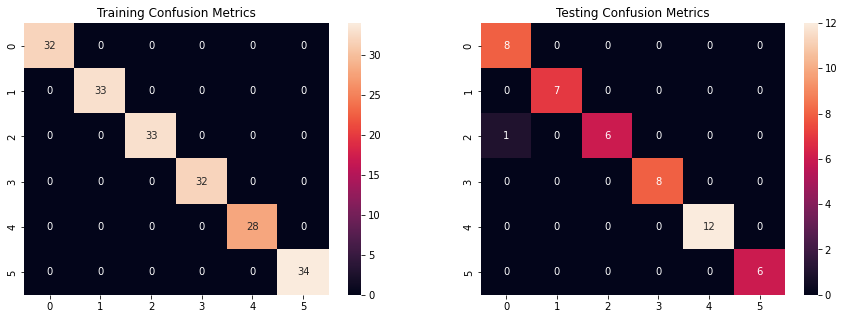

In [38]:
model=FIT(LinearDiscriminantAnalysis())
pickle.dump(model, open('LinearDiscriminantAnalysis_Model.pkl', 'wb'))

Training Accuracy : 1.0
Testing Accuracy : 1.0
                    Classificatio Report
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
 Hyper Giants       1.00      1.00      1.00         7
Main Sequence       1.00      1.00      1.00         7
    Red Dwarf       1.00      1.00      1.00         8
 Super Giants       1.00      1.00      1.00        12
  White Dwarf       1.00      1.00      1.00         6

     accuracy                           1.00        48
    macro avg       1.00      1.00      1.00        48
 weighted avg       1.00      1.00      1.00        48



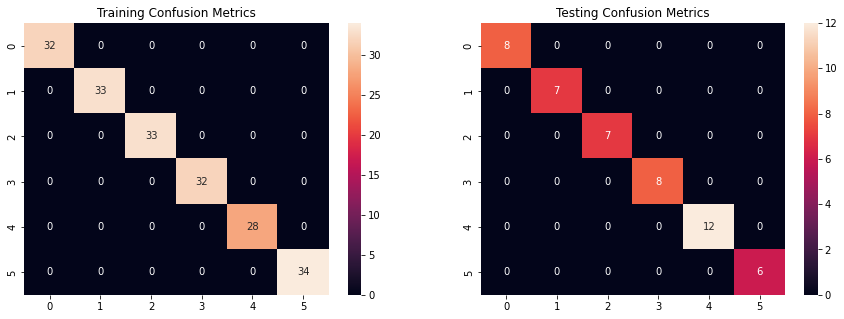

In [39]:
model=FIT(RandomForestClassifier())
pickle.dump(model, open('RandomForestClassifier_Model.pkl', 'wb'))

## Report Generating

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
import os
os._exit(00)

In [7]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport 

In [8]:
profile = ProfileReport(data, title="data set", html={'style' : {'full_width':True}})
profile.to_file(output_file="AstromonyDataReport.html") 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]